### Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from prophet import Prophet

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### Egypt

In [2]:
Egypt_dataset = pd.read_excel('Egypt_Dataset.xlsx')

In [3]:
Egypt_dataset.head(20)

,Country or region,Country code,ds,Bioenergy_yhat,Coal_yhat,Gas_yhat,Hydro_yhat,Solar_yhat,Wind_yhat,Emission
0,Egypt,EGY,2000-01-01,0,0,43.41,13.56,0.00,0.14,453.203
1,Egypt,EGY,2001-01-01,0,0,47.04,14.98,0.00,0.22,446.012
2,Egypt,EGY,2002-01-01,0,0,57.33,12.73,0.00,0.20,455.017
3,Egypt,EGY,2003-01-01,0,0,62.61,12.89,0.00,0.37,455.570
4,Egypt,EGY,2004-01-01,0,0,72.92,12.52,0.00,0.52,449.226
5,Egypt,EGY,2005-01-01,0,0,75.37,12.52,0.00,0.55,460.838
6,Egypt,EGY,2006-01-01,0,0,81.21,12.80,0.00,0.62,461.370
7,Egypt,EGY,2007-01-01,0,0,87.18,15.35,0.00,0.83,453.696
8,Egypt,EGY,2008-01-01,0,0,90.48,14.53,0.00,0.91,463.110
9,Egypt,EGY,2009-01-01,0,0,94.85,12.73,0.00,1.13,477.482


In [4]:
#Remove a column in the dataset
Egypt_dataset = Egypt_dataset.drop(['Emission'], axis=1)

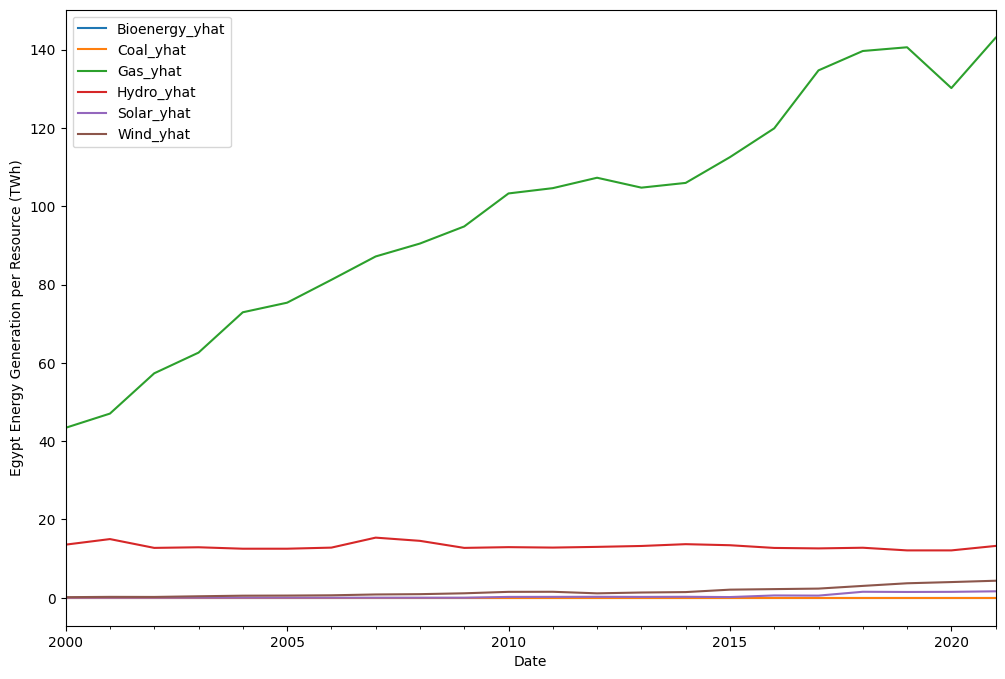

In [5]:
ax = Egypt_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Egypt Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
plt.show()

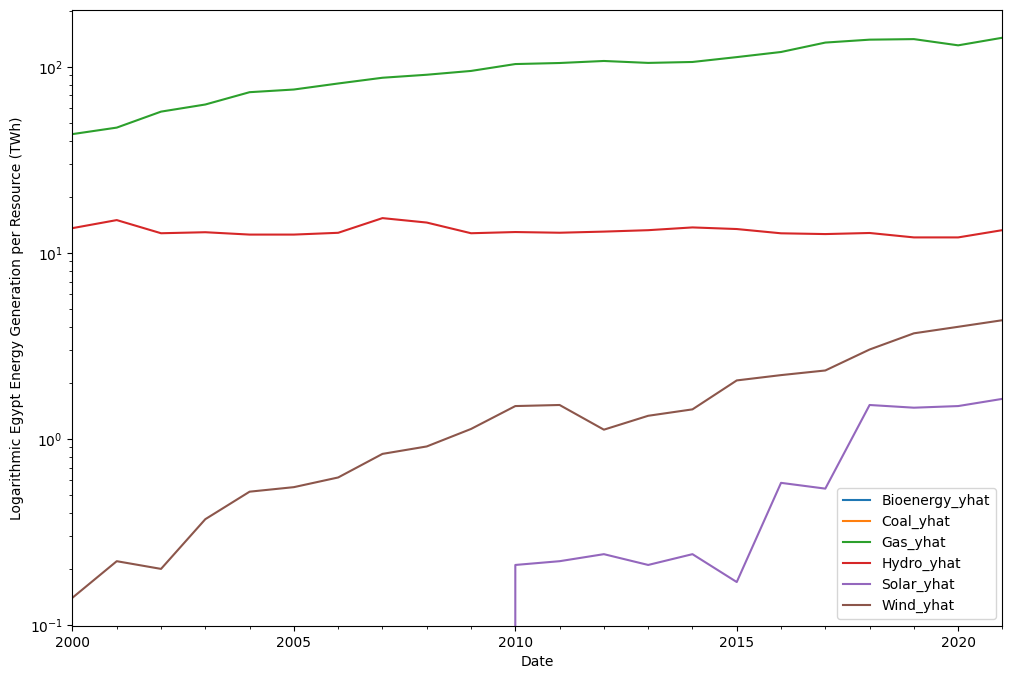

In [6]:
# Make y-axis in log scale
ax = Egypt_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Logarithmic Egypt Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### Egypt's bioenergy

In [7]:
Egypt_BioenergyModel = Prophet()

##### Model Validation


In [8]:
Egypt_BioenergyValidationModel = Prophet()
columns_to_load = ['ds', 'Bioenergy_yhat']
dataset_bioenergy = pd.read_excel('Egypt_Dataset.xlsx', usecols=columns_to_load)
dataset_bioenergy = dataset_bioenergy.rename(columns={'ds': 'ds',
                        'Bioenergy_yhat': 'y'})

# Take just the first 15 rows for training
dataset_bioenergy_validation = dataset_bioenergy[:15]
Egypt_BioenergyValidationModel.fit(dataset_bioenergy_validation)
future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
future_validation = pd.DataFrame({'ds': future_years_validation})
forecast_validation = Egypt_BioenergyValidationModel.predict(future_validation)

In [9]:
datasetX = dataset_bioenergy[15:]
forecast_validation = forecast_validation[['ds', 'yhat']]

pred = forecast_validation['yhat']
correc = datasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(correc, pred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(correc, pred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((correc - pred) / correc)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

Mean Squared Error: 0.000
Root Mean Squared Error: 0.000
Mean Absolute Percentage Error: nan


#### Model Training


In [10]:
columns_to_load = ['ds', 'Bioenergy_yhat']
dataset_bioenergy = pd.read_excel('Egypt_Dataset.xlsx', usecols=columns_to_load)
dataset_bioenergy = dataset_bioenergy.rename(columns={'ds': 'ds',
                        'Bioenergy_yhat': 'y'})
Egypt_BioenergyModel.fit(dataset_bioenergy)

In [11]:
future_years = pd.date_range(start='2022', end='2051', freq='Y')
future = pd.DataFrame({'ds': future_years})
forecast = Egypt_BioenergyModel.predict(future)

In [12]:
columns_to_load = ['ds', 'yhat']
forecasted_values =forecast.loc[:, columns_to_load]
forecasted_values = forecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Egypt_Bioenergy = pd.concat([dataset_bioenergy, forecasted_values], ignore_index=True)
Egypt_Bioenergy = Egypt_Bioenergy.rename(columns={'ds': 'ds', 'y': 'Bioenergy_yhat'})
Egypt_Bioenergy.head(51)

,ds,Bioenergy_yhat
0,2000-01-01,0.0
1,2001-01-01,0.0
2,2002-01-01,0.0
3,2003-01-01,0.0
4,2004-01-01,0.0
5,2005-01-01,0.0
6,2006-01-01,0.0
7,2007-01-01,0.0
8,2008-01-01,0.0
9,2009-01-01,0.0


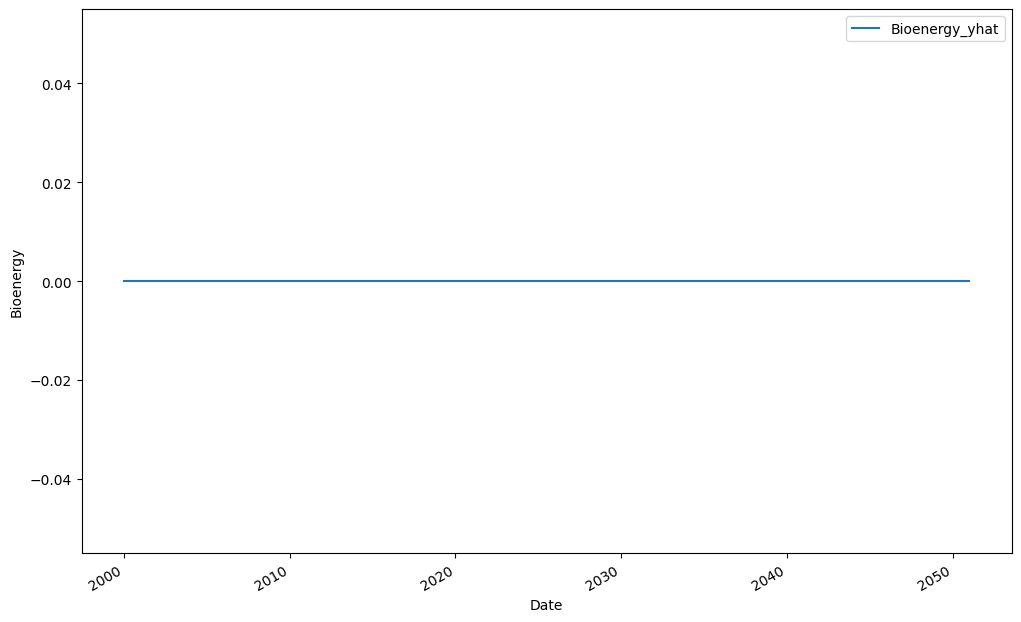

In [13]:
ax = Egypt_Bioenergy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Bioenergy')
ax.set_xlabel('Date')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14968\2591056262.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


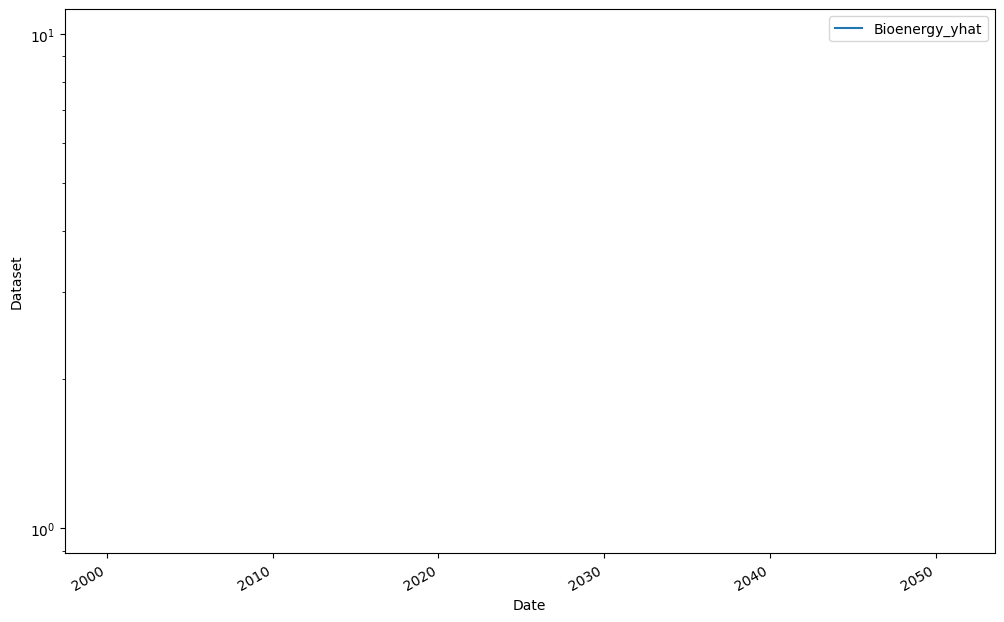

In [14]:
# Make y-axis in log scale
ax = Egypt_Bioenergy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Dataset')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### Egypt Coal Model

In [15]:
Egypt_CoalModel = Prophet()

Egypt_CoalValidationModel = Prophet()
columns_to_load = ['ds', 'Coal_yhat']
dataset_Coal = pd.read_excel('Egypt_Dataset.xlsx', usecols=columns_to_load)
dataset_Coal = dataset_Coal.rename(columns={'ds': 'ds',
                        'Coal_yhat': 'y'})

# Take just the first 15 rows for training
dataset_CoalValidation = dataset_Coal[:15]
Egypt_CoalValidationModel.fit(dataset_CoalValidation)
Coal_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Coal_future_validation = pd.DataFrame({'ds': Coal_future_years_validation})
Coal_forecast_validation = Egypt_CoalValidationModel.predict(Coal_future_validation)

CoaldatasetX = dataset_Coal[15:]
Coal_forecast_validation = Coal_forecast_validation[['ds', 'yhat']]

CoalPred = Coal_forecast_validation['yhat']
CoalCorrec = CoaldatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(CoalCorrec, CoalPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(CoalCorrec, CoalPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((CoalCorrec - CoalPred) / CoalCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

Mean Squared Error: 0.000
Root Mean Squared Error: 0.000
Mean Absolute Percentage Error: nan


In [16]:
columns_to_load = ['ds', 'Coal_yhat']
dataset_Coal = pd.read_excel('Egypt_Dataset.xlsx', usecols=columns_to_load)
dataset_Coal = dataset_Coal.rename(columns={'ds': 'ds',
                        'Coal_yhat': 'y'})
Egypt_CoalModel.fit(dataset_Coal)

CoalFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
CoalFuture = pd.DataFrame({'ds': CoalFuture_years})
CoalForecast = Egypt_CoalModel.predict(CoalFuture)
columns_to_load = ['ds', 'yhat']
CoalForecasted_values = CoalForecast.loc[:, columns_to_load]
CoalForecasted_values = CoalForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Egypt_Coal = pd.concat([dataset_Coal, CoalForecasted_values], ignore_index=True)
Egypt_Coal = Egypt_Coal.rename(columns={'ds': 'ds', 'y': 'Coal_yhat'})


In [17]:


Egypt_Coal.head(51)

,ds,Coal_yhat
0,2000-01-01,0.0
1,2001-01-01,0.0
2,2002-01-01,0.0
3,2003-01-01,0.0
4,2004-01-01,0.0
5,2005-01-01,0.0
6,2006-01-01,0.0
7,2007-01-01,0.0
8,2008-01-01,0.0
9,2009-01-01,0.0


#### Egypt Gas 


In [18]:
Egypt_GasModel = Prophet()

Egypt_GasValidationModel = Prophet()
columns_to_load = ['ds', 'Gas_yhat']
dataset_Gas = pd.read_excel('Egypt_Dataset.xlsx', usecols=columns_to_load)
dataset_Gas = dataset_Gas.rename(columns={'ds': 'ds',
                        'Gas_yhat': 'y'})

# Take just the first 15 rows for training
dataset_GasValidation = dataset_Gas[:15]
Egypt_GasValidationModel.fit(dataset_GasValidation)
Gas_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Gas_future_validation = pd.DataFrame({'ds': Gas_future_years_validation})
Gas_forecast_validation = Egypt_GasValidationModel.predict(Gas_future_validation)

GasdatasetX = dataset_Gas[15:]
Gas_forecast_validation = Gas_forecast_validation[['ds', 'yhat']]

GasPred = Gas_forecast_validation['yhat']
GasCorrec = GasdatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(GasCorrec, GasPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(GasCorrec, GasPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((GasCorrec - GasPred) / GasCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:16:05 - cmdstanpy - INFO - Chain [1] start processing
18:16:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 115.425
Root Mean Squared Error: 10.744
Mean Absolute Percentage Error: nan


In [19]:
columns_to_load = ['ds', 'Gas_yhat']
dataset_Gas = pd.read_excel('Egypt_Dataset.xlsx', usecols=columns_to_load)
dataset_Gas = dataset_Gas.rename(columns={'ds': 'ds',
                        'Gas_yhat': 'y'})
Egypt_GasModel.fit(dataset_Gas)

GasFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
GasFuture = pd.DataFrame({'ds': GasFuture_years})
GasForecast = Egypt_GasModel.predict(GasFuture)
columns_to_load = ['ds', 'yhat']
GasForecasted_values = GasForecast.loc[:, columns_to_load]
GasForecasted_values = GasForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Egypt_Gas = pd.concat([dataset_Gas, GasForecasted_values], ignore_index=True)
Egypt_Gas = Egypt_Gas.rename(columns={'ds': 'ds', 'y': 'Gas_yhat'})

18:16:05 - cmdstanpy - INFO - Chain [1] start processing
18:16:05 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
Egypt_Gas.head(51)

,ds,Gas_yhat
0,2000-01-01,43.410000
1,2001-01-01,47.040000
2,2002-01-01,57.330000
3,2003-01-01,62.610000
4,2004-01-01,72.920000
5,2005-01-01,75.370000
6,2006-01-01,81.210000
7,2007-01-01,87.180000
8,2008-01-01,90.480000
9,2009-01-01,94.850000


#### Egypt Hydro

In [21]:
Egypt_HydroModel = Prophet()

Egypt_HydroValidationModel = Prophet()
columns_to_load = ['ds', 'Hydro_yhat']
dataset_Hydro = pd.read_excel('Egypt_Dataset.xlsx', usecols=columns_to_load)
dataset_Hydro = dataset_Hydro.rename(columns={'ds': 'ds',
                        'Hydro_yhat': 'y'})

# Take just the first 15 rows for training
dataset_HydroValidation = dataset_Hydro[:15]
Egypt_HydroValidationModel.fit(dataset_HydroValidation)
Hydro_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Hydro_future_validation = pd.DataFrame({'ds': Hydro_future_years_validation})
Hydro_forecast_validation = Egypt_HydroValidationModel.predict(Hydro_future_validation)

HydrodatasetX = dataset_Hydro[15:]
Hydro_forecast_validation = Hydro_forecast_validation[['ds', 'yhat']]

HydroPred = Hydro_forecast_validation['yhat']
HydroCorrec = HydrodatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(HydroCorrec, HydroPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(HydroCorrec, HydroPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((HydroCorrec - HydroPred) / HydroCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:16:06 - cmdstanpy - INFO - Chain [1] start processing
18:16:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 0.712
Root Mean Squared Error: 0.844
Mean Absolute Percentage Error: nan


In [22]:
columns_to_load = ['ds', 'Hydro_yhat']
dataset_Hydro = pd.read_excel('Egypt_Dataset.xlsx', usecols=columns_to_load)
dataset_Hydro = dataset_Hydro.rename(columns={'ds': 'ds',
                        'Hydro_yhat': 'y'})
Egypt_HydroModel.fit(dataset_Hydro)

HydroFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
HydroFuture = pd.DataFrame({'ds': HydroFuture_years})
HydroForecast = Egypt_HydroModel.predict(HydroFuture)
columns_to_load = ['ds', 'yhat']
HydroForecasted_values = HydroForecast.loc[:, columns_to_load]
HydroForecasted_values = HydroForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Egypt_Hydro = pd.concat([dataset_Hydro, HydroForecasted_values], ignore_index=True)
Egypt_Hydro = Egypt_Hydro.rename(columns={'ds': 'ds', 'y': 'Hydro_yhat'})

18:16:06 - cmdstanpy - INFO - Chain [1] start processing
18:16:07 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
Egypt_Hydro.head(51)

,ds,Hydro_yhat
0,2000-01-01,13.560000
1,2001-01-01,14.980000
2,2002-01-01,12.730000
3,2003-01-01,12.890000
4,2004-01-01,12.520000
5,2005-01-01,12.520000
6,2006-01-01,12.800000
7,2007-01-01,15.350000
8,2008-01-01,14.530000
9,2009-01-01,12.730000


#### Egypt Solar

In [24]:
Egypt_SolarModel = Prophet()

Egypt_SolarValidationModel = Prophet()
columns_to_load = ['ds', 'Solar_yhat']
dataset_Solar = pd.read_excel('Egypt_Dataset.xlsx', usecols=columns_to_load)
dataset_Solar = dataset_Solar.rename(columns={'ds': 'ds',
                        'Solar_yhat': 'y'})

# Take just the first 15 rows for training
dataset_SolarValidation = dataset_Solar[:15]
Egypt_SolarValidationModel.fit(dataset_SolarValidation)
Solar_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Solar_future_validation = pd.DataFrame({'ds': Solar_future_years_validation})
Solar_forecast_validation = Egypt_SolarValidationModel.predict(Solar_future_validation)

SolardatasetX = dataset_Solar[15:]
Solar_forecast_validation = Solar_forecast_validation[['ds', 'yhat']]

SolarPred = Solar_forecast_validation['yhat']
SolarCorrec = SolardatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(SolarCorrec, SolarPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(SolarCorrec, SolarPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((SolarCorrec - SolarPred) / SolarCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:16:07 - cmdstanpy - INFO - Chain [1] start processing
18:16:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 0.791
Root Mean Squared Error: 0.890
Mean Absolute Percentage Error: nan


In [25]:
columns_to_load = ['ds', 'Solar_yhat']
dataset_Solar = pd.read_excel('Egypt_Dataset.xlsx', usecols=columns_to_load)
dataset_Solar = dataset_Solar.rename(columns={'ds': 'ds',
                        'Solar_yhat': 'y'})
Egypt_SolarModel.fit(dataset_Solar)

SolarFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
SolarFuture = pd.DataFrame({'ds': SolarFuture_years})
SolarForecast = Egypt_SolarModel.predict(SolarFuture)
columns_to_load = ['ds', 'yhat']
SolarForecasted_values = SolarForecast.loc[:, columns_to_load]
SolarForecasted_values = SolarForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Egypt_Solar = pd.concat([dataset_Solar, SolarForecasted_values], ignore_index=True)
Egypt_Solar = Egypt_Solar.rename(columns={'ds': 'ds', 'y': 'Solar_yhat'})

18:16:07 - cmdstanpy - INFO - Chain [1] start processing
18:16:08 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
Egypt_Solar.head(51)

,ds,Solar_yhat
0,2000-01-01,0.000000
1,2001-01-01,0.000000
2,2002-01-01,0.000000
3,2003-01-01,0.000000
4,2004-01-01,0.000000
5,2005-01-01,0.000000
6,2006-01-01,0.000000
7,2007-01-01,0.000000
8,2008-01-01,0.000000
9,2009-01-01,0.000000


#### Egypt Wind

In [27]:
Egypt_WindModel = Prophet()

Egypt_WindValidationModel = Prophet()
columns_to_load = ['ds', 'Wind_yhat']
dataset_Wind = pd.read_excel('Egypt_Dataset.xlsx', usecols=columns_to_load)
dataset_Wind = dataset_Wind.rename(columns={'ds': 'ds',
                        'Wind_yhat': 'y'})

# Take just the first 15 rows for training
dataset_WindValidation = dataset_Wind[:15]
Egypt_WindValidationModel.fit(dataset_WindValidation)
Wind_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Wind_future_validation = pd.DataFrame({'ds': Wind_future_years_validation})
Wind_forecast_validation = Egypt_WindValidationModel.predict(Wind_future_validation)

WinddatasetX = dataset_Wind[15:]
Wind_forecast_validation = Wind_forecast_validation[['ds', 'yhat']]

WindPred = Wind_forecast_validation['yhat']
WindCorrec = WinddatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(WindCorrec, WindPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(WindCorrec, WindPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((WindCorrec - WindPred) / WindCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:16:08 - cmdstanpy - INFO - Chain [1] start processing
18:16:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 1.638
Root Mean Squared Error: 1.280
Mean Absolute Percentage Error: nan


In [28]:
columns_to_load = ['ds', 'Wind_yhat']
dataset_Wind = pd.read_excel('Egypt_Dataset.xlsx', usecols=columns_to_load)
dataset_Wind = dataset_Wind.rename(columns={'ds': 'ds',
                        'Wind_yhat': 'y'})
Egypt_WindModel.fit(dataset_Wind)

WindFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
WindFuture = pd.DataFrame({'ds': WindFuture_years})
WindForecast = Egypt_WindModel.predict(WindFuture)
columns_to_load = ['ds', 'yhat']
WindForecasted_values = WindForecast.loc[:, columns_to_load]
WindForecasted_values = WindForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Egypt_Wind = pd.concat([dataset_Wind, WindForecasted_values], ignore_index=True)
Egypt_Wind = Egypt_Wind.rename(columns={'ds': 'ds', 'y': 'Wind_yhat'})

18:16:08 - cmdstanpy - INFO - Chain [1] start processing
18:16:09 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
Egypt_Wind.head(51)

,ds,Wind_yhat
0,2000-01-01,0.140000
1,2001-01-01,0.220000
2,2002-01-01,0.200000
3,2003-01-01,0.370000
4,2004-01-01,0.520000
5,2005-01-01,0.550000
6,2006-01-01,0.620000
7,2007-01-01,0.830000
8,2008-01-01,0.910000
9,2009-01-01,1.130000


In [30]:
FullEgyptData = pd.merge(Egypt_Bioenergy, Egypt_Coal, on='ds')
FullEgyptData = pd.merge(FullEgyptData, Egypt_Gas, on='ds')
FullEgyptData = pd.merge(FullEgyptData, Egypt_Hydro, on='ds')
FullEgyptData = pd.merge(FullEgyptData, Egypt_Solar, on='ds')
FullEgyptData = pd.merge(FullEgyptData, Egypt_Wind, on='ds')
FullEgyptData.rename(columns={'ds': 'ds', 'Bioenergy_yhat': 'Bioenergy', 'Coal_yhat': 'Coal', 'Gas_yhat': 'Gas', 'Hydro_yhat': 'Hydro', 'Solar_yhat': 'Solar', 'Wind_yhat': 'Wind'}, inplace=True)
FullEgyptData.head(51)

,ds,Bioenergy,Coal,Gas,Hydro,Solar,Wind
0,2000-01-01,0.0,0.0,43.410000,13.560000,0.000000,0.140000
1,2001-01-01,0.0,0.0,47.040000,14.980000,0.000000,0.220000
2,2002-01-01,0.0,0.0,57.330000,12.730000,0.000000,0.200000
3,2003-01-01,0.0,0.0,62.610000,12.890000,0.000000,0.370000
4,2004-01-01,0.0,0.0,72.920000,12.520000,0.000000,0.520000
5,2005-01-01,0.0,0.0,75.370000,12.520000,0.000000,0.550000
6,2006-01-01,0.0,0.0,81.210000,12.800000,0.000000,0.620000
7,2007-01-01,0.0,0.0,87.180000,15.350000,0.000000,0.830000
8,2008-01-01,0.0,0.0,90.480000,14.530000,0.000000,0.910000
9,2009-01-01,0.0,0.0,94.850000,12.730000,0.000000,1.130000


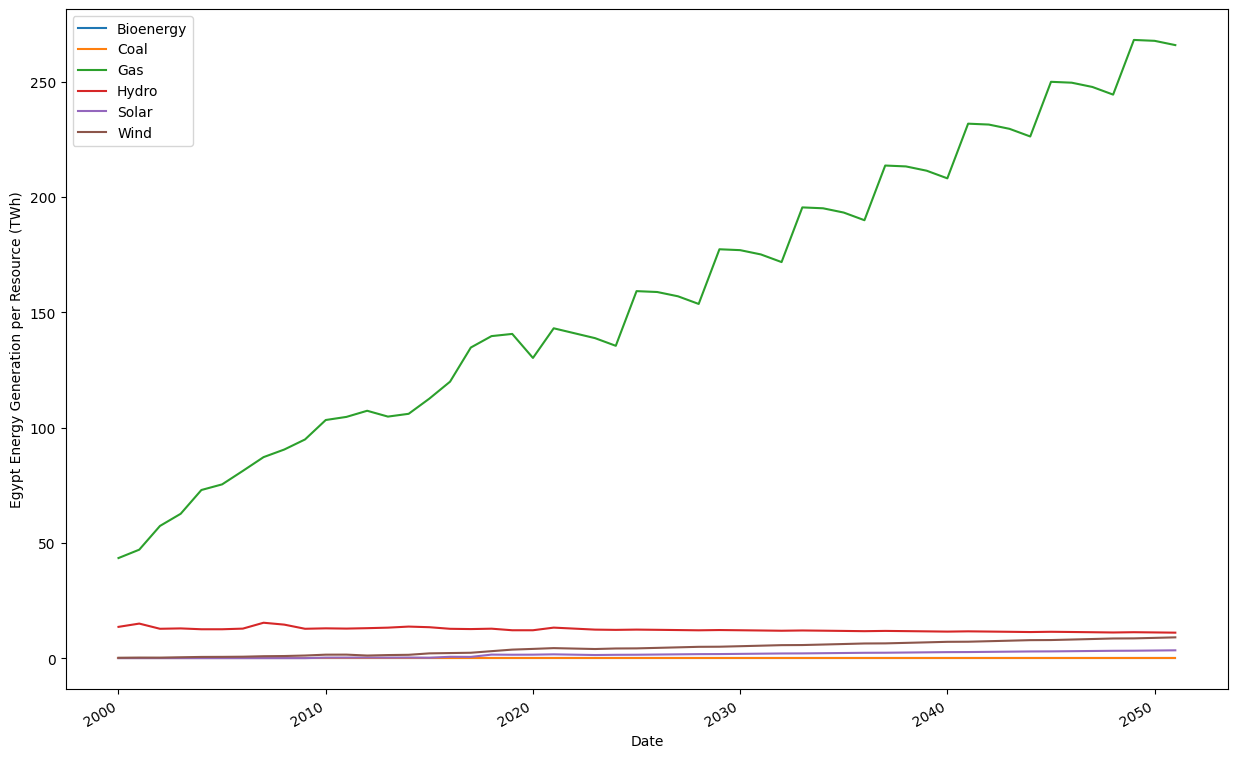

In [31]:
EgyptPlot = FullEgyptData.set_index('ds').plot(figsize=(15, 10))
EgyptPlot.set_ylabel('Egypt Energy Generation per Resource (TWh)')
EgyptPlot.set_xlabel('Date')  
plt.show()

In [32]:
Egypt_file_name = 'Predicted_Egypt_Dataset.xlsx'
FullEgyptData.to_excel(Egypt_file_name, index=False)